In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import container
import scipy.interpolate as interp
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
# plt.style.use('~/.config/matplotlib/stylelib/paper.mplstyle')

In [2]:
Nx = [1,2,4,8]
nround = 20 # 20 for regular, 10 for mnist
datadir = "./records/"
allnames = ["rnn","rnn-k0.5"]
allnames += ["th-"+str(i) for i in Nx]
allnames += ["th-e0.01-"+str(i) for i in Nx]
allnames += ["th-k0.5-"+str(i) for i in Nx]
allnames += ["xyth-"+str(i) for i in Nx]

allnames = ["fnn-mnist-1","fnn-mnist_ordered-1","mnist_lrg"]
nround = 5

fnames = allnames

In [3]:
# Gather data
# [epoch trnloss trnacc testloss testacc]
data = {}
params = {}

In [4]:
for f in fnames:
    print "Gathering data for ",f
    nepoch = -1
    fin = open(datadir+f,'r')
    
    nbreak = -2
    nep_eval = 0 # How many eps were evaluated per round
    for line in fin.readlines():
        if line=="\n":
            if nbreak < 0: 
                nbreak+=1
                continue
            else: break

        l = line.split()
        if l[0]=="nEpoch": nepoch = int(l[1])

        if nbreak == -1:
            nep_eval+=1
    
    params.update({f: 
                   {"nepoch": nepoch}})
    
    data_ = np.zeros(shape=(nround,nep_eval,4))
    iround = -1 # first newline is counted
    e = 0
    fin.seek(0)
    for line in fin.readlines():
        if line[0].isalpha() or line[0]=="[": continue # newline is not alpha
        if line=="\n":
            # Done a round
            iround+=1
            e = 0
            if iround >= nround:
                break
            continue
        data_[iround,e,:] = [float(x) for x in line.split()[1:]]
        # For now we know epocheval = 1
        e+=1
    
    data.update({f:data_})
    
    fin.close()
print "Done"

Gathering data for  fnn-mnist-1
Gathering data for  fnn-mnist_ordered-1
Gathering data for  mnist_lrg
Done


In [4]:
# Gathering the special xtud compare data
# [epoch trnloss trnacc testloss testacc xacc tacc uacc dacc]
fnames = ["th-xtud-1"]
nfields = 8

data = {}
params = {}
for f in fnames:
    print "Gathering data for ",f
    nepoch = -1
    fin = open(datadir+f,'r')
    
    nbreak = -2
    nep_eval = 0 # How many eps were evaluated per round
    for line in fin.readlines():
        if line=="\n":
            if nbreak < 0: 
                nbreak+=1
                continue
            else: break

        l = line.split()
        if l[0]=="nEpoch": nepoch = int(l[1])

        if nbreak == -1:
            nep_eval+=1
    
    params.update({f: 
                   {"nepoch": nepoch}})
    
    data_ = np.zeros(shape=(nround,nep_eval,nfields))
    iround = -1 # first newline is counted
    e = 0
    fin.seek(0)
    for line in fin.readlines():
        if line[0].isalpha() or line[0]=="[": continue # newline is not alpha
        if line=="\n":
            # Done a round
            iround+=1
            e = 0
            continue
        data_[iround,e,:] = [float(x) for x in line.split()[1:]]
        # For now we know epocheval = 1
        e+=1
    
    data.update({f:data_})
    
    fin.close()
print "Done"


Gathering data for  th-xtud-1
Done


In [5]:
# Stat analysis on data
means = {}
stds = {}
# for nx in data:
for f in fnames:
    st = f
    dat = data[st]
    means_ = np.zeros(shape=dat[0].shape)
    means_ = np.mean(dat,axis=0)
    means.update({str(st): means_})
    
    stds_ = np.zeros(shape=dat[0].shape)
    stds_ = np.std(dat,axis=0)
    stds.update({st: stds_})
print "Done"

Done


In [23]:
plt.rcParams['font.sans-serif']

[u'Helvetica']

In [7]:
import seaborn as sns
import itertools
sns.set()
sns.set_palette("Blues")
sns.set_style("white")
S = sns.set_style("ticks",{"xtick.major.size":0.8,"ytick.major.size":0.8})
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
palette = itertools.cycle(sns.color_palette())


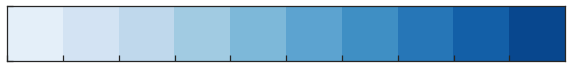

In [8]:
st = "Blues"
sns.set_palette(st)
pal = sns.color_palette(st,10)
palette = itertools.cycle(sns.color_palette())
# next(palette)
sns.palplot(pal)

In [46]:
for n in range(len(allnames)):
    print n, allnames[n]

0 fnn-mnist-1
1 fnn-mnist_ordered-1
2 mnist_lrg


In [9]:
chosens = [0,2]
bRNN = False

markers = [(3,0,0),(4,0,0),(5,0,0),(6,0,0)]
markers = ['o','s','>','d']
legnames = [r'm=1',
            r'm=2',
            r'm=4',
            r'm=8'
           ]
# legnames = ['RNN',
#             r'$xy\theta_{1\times 1}$',
#             r'$xy\theta_{2\times 2}$'
#            ]
legnames = ['FNN',
            'RNN',
           ]
# legnames = ['RNN']
pltnames = []
for i in chosens:
    pltnames.append(allnames[i])
lennx = len(pltnames)
# 0.,1.0 -> 0.8,0.1
colalph = 0.7
colors = [(0.8,0.8*((float(x)/lennx)),1.-0.9*(float(x)/lennx)) for x in range(lennx)]
# colors = ['w','r']
erralph = 0.15

coldict,markdict,legdict = {},{},{}
for i in range(lennx):
    n = pltnames[i]
    coldict.update({n:next(palette)})
    markdict.update({n:markers[i]})
    legdict.update({n:legnames[i]})

In [12]:
coldict[allnames[0]] = "w"
coldict[allnames[2]] = (1,0,0)

In [36]:
coldict["rnn"] = (1,0,0)

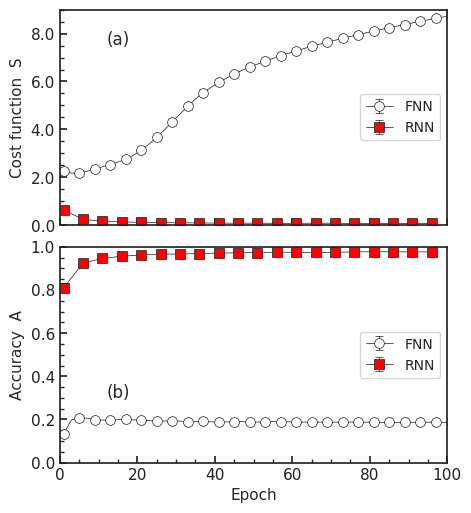

In [13]:
plt.style.use('~/.config/matplotlib/stylelib/paper.mplstyle')
# minorLocator = AutoMinorLocator()

m = 1.0
figsize = (5*m,6*m) # increase figure size to make things look smaller
dpi = 100 # increase dpi to make things look bigger BUT only here
# since i'm doing pdf, it really doesn't matter what dpi I choose
capsize=3

# plt.rc('lines',markersize=8)
# plt.rc('font',family='sans-serif')
# plt.rc('font',sans-serif="Helvetica")
plt.rcParams.update({
    'font.family' : 'sans-serif',
    'font.sans-serif' : ['Helvetica'],
    'lines.markersize' : 7,
    'legend.fontsize' : 10,
    })
f, ax = plt.subplots(2,1,figsize=figsize,dpi=dpi)


for run in pltnames:
# for nx in Nx:
    mev = 1
    nepoch = params[run]["nepoch"]
    x = np.arange(1,nepoch+1,nepoch//(len(means[run])))
    end = len(x)//2 #-1 for all
    spidx = [0,2,4,6,7,10,20,30,48]

    if run == "fnn-mnist-1":
        mev = 2
        end = -1
    if run == "mnist_lrg":
        spidx = [0,1,2,3,4,8,14,19]
    x = x[0:end]
    
    y0 = means[run][:,2][0:end]
    y0m = means[run][:,2]-stds[run][:,2]
    y0p = means[run][:,2]+stds[run][:,2]
    y1 = means[run][:,3][0:end]
    y1m = means[run][:,3]-stds[run][:,3]
    y1p = means[run][:,3]+stds[run][:,3]
    
    y0err = stds[run][:,2][0:end]
    y1err = stds[run][:,3][0:end]
    
#     splgap = 10
#     spx = np.linspace(x[0],x[-1],200)
#     spl0 = interp.splrep(x[spidx],y0[spidx],k=3)
#     spl1 = interp.splrep(x[spidx],y1[spidx],k=3)
    
#     y0_sp = interp.splev(spx,spl0)
#     y1_sp = interp.splev(spx,spl1)

#     ax[0].plot(spx,y0_sp,'k',alpha=0.7)
    fc = coldict[run]
    ax[0].errorbar(x,y0,yerr=y0err,linestyle="-",color='k',
                   marker=markdict[run],label=legdict[run],
                   errorevery=mev,markevery=mev,
                   mfc=fc,mec="k",ecolor="k",capsize=capsize)

#     ax[1].plot(spx,y1_sp,'k',alpha=0.7)
    ax[1].errorbar(x,y1,yerr=y1err,linestyle="-",color='k',
                   marker=markdict[run],label=legdict[run],
                   errorevery=mev,markevery=mev,
                   mfc=fc,mec="k",ecolor="k",capsize=capsize)

    i+=1

f.subplots_adjust(hspace=0.1)
ax[1].set_xlabel("Epoch")
ax[0].set_ylabel("Cost function  S")
ax[1].set_ylabel("Accuracy  A")

if bRNN:
    _ = ax[0].set_xlim(0,50)
    ax[0].tick_params(axis='x',labelbottom='off')
    _ = ax[0].set_ylim(0,1.5)
    _ = ax[0].set_yticks(np.linspace(0,1.5,4))
    ax[0].tick_params(axis='both',which='both',direction='in')

    _ = ax[1].set_xticks(np.arange(0,51,10))
    _ = ax[1].set_xlim(0,50)
    _ = ax[1].set_ylim(ymax=1.0,ymin=0.)
    _ = ax[1].set_yticks(np.linspace(0,1,6))
    ax[1].tick_params(axis='both',which='both',direction='in')

    ax[0].text(.12,.84,'(c) RNN',
        horizontalalignment='left',
        transform=ax[0].transAxes)
    ax[1].text(.12,.16,'(d) RNN',
        horizontalalignment='left',
        transform=ax[1].transAxes)

else:
    plt.legend()
    ax[0].legend(ncol=1,loc="right")
    ax[1].legend(ncol=1,loc="right")

    ax[0].tick_params(axis='x',labelbottom=False)
    # ax[0].set_yscale("log", nonposy='mask')
    _ = ax[0].set_xlim(0,100)
    _ = ax[0].set_xticks(np.arange(0,101,20))
#     _ = ax[0].set_ylim(0.04,10)
    _ = ax[0].set_ylim(0,1.5)
    _ = ax[0].set_ylim(0.,9.)
#     _ = ax[0].set_yticks(np.linspace(0,1.5,4))

    _ = ax[1].set_xticks(np.arange(0,101,20))
    _ = ax[1].set_xlim(0,100)
    _ = ax[1].set_ylim(ymax=1.0,ymin=0.)
    _ = ax[1].set_yticks(np.linspace(0,1,6))

    ax[0].text(.12,.84,'(a)',
        horizontalalignment='left',
        transform=ax[0].transAxes)
    ax[1].text(.12,.3,'(b)',
        horizontalalignment='left',
        transform=ax[1].transAxes)
    
ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f')) # add decimal place to ticklabels
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax[0].minorticks_on()
ax[1].minorticks_on()
ax[0].tick_params(axis='both',which='both',direction='in')
ax[0].tick_params(which='major', length=5)
ax[0].tick_params(which='minor', length=3)
ax[1].tick_params(axis='both',which='both',direction='in')
ax[1].tick_params(which='major', length=5)
ax[1].tick_params(which='minor', length=3)


In [14]:
figname="imgs/mnist_SA"
ans = raw_input("You want to save "+figname+"?")
if ans != "no":
    print "Saving fig"
    f.savefig(figname+".eps",bbox_inches='tight',dpi="figure")

You want to save imgs/mnist_SA?
Saving fig


In [23]:
figname="imgs/FNN_SA_blue"
ans = raw_input("You want to save "+figname+"?")
if ans != "no":
    print "Saving fig"
    f.savefig(figname+".pdf",bbox_inches='tight',dpi="figure")

You want to save imgs/FNN_SA_blue?
Saving fig


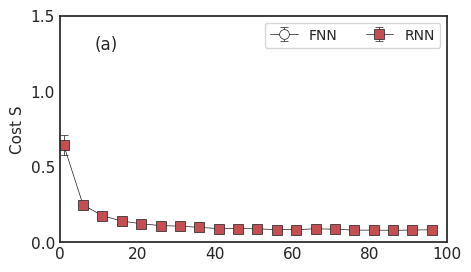

In [15]:
# For plotting the Cost
plt.style.use('~/.config/matplotlib/stylelib/paper.mplstyle')
# minorLocator = AutoMinorLocator()

m = 1.0
figsize = (5*m,3*m) # increase figure size to make things look smaller
dpi = 100 # increase dpi to make things look bigger BUT only here
# since i'm doing pdf, it really doesn't matter what dpi I choose
capsize=3

# plt.rc('lines',markersize=8)
# plt.rc('font',family='sans-serif')
# plt.rc('font',sans-serif="Helvetica")
plt.rcParams.update({
    'font.family' : 'sans-serif',
    'font.sans-serif' : ['Helvetica'],
    'lines.markersize' : 7,
    'legend.fontsize' : 10,
    })
f, ax = plt.subplots(1,1,figsize=figsize,dpi=dpi)


for run in pltnames:
# for nx in Nx:
    mev = 1
    nepoch = params[run]["nepoch"]
    x = np.arange(1,nepoch+1,nepoch//(len(means[run])))
    end = len(x)//2 #-1 for all
    spidx = [0,2,4,6,7,10,20,30,47]

    if run == "fnn-mnist_ordered-1":
        end = -1
    if run == "mnist_lrg":
        mev = 1
        spidx = [0,1,2,3,4,8,14,19]
    x = x[0:end]
    
    y0 = means[run][:,2][0:end]
    y0m = means[run][:,2]-stds[run][:,2]
    y0p = means[run][:,2]+stds[run][:,2]
    
    y0err = stds[run][:,2][0:end]
  
    splgap = 10
    spx = np.linspace(x[0],x[-1],200)
    spl0 = interp.splrep(x[spidx],y0[spidx],k=2)
    
    y0_sp = interp.splev(spx,spl0)

#     ax.plot(spx,y0_sp,'k-',alpha=0.7)
    ax.errorbar(x,y0,yerr=y0err,linestyle="-",color='k',
                   marker=markdict[run],label=legdict[run],
                   errorevery=mev,markevery=mev,
                   mfc=coldict[run],mec='k',capsize=capsize)

handles, labels = ax.get_legend_handles_labels()
handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]

ax.legend(handles, labels,ncol=2)
#ax[1].legend(handles,labels,ncol=2,loc='lower right')
plt.legend()
ax.legend(ncol=2,loc="upper right")

f.subplots_adjust(hspace=0.1)
# ax.set_xlabel("Epoch")
ax.set_ylabel("Cost S")

_ = ax.set_xticks(np.arange(0,101,20))
# ax.set_xticks([])
# ax.tick_params(axis='x',labelbottom='off')
# ax.set_yscale("log", nonposy='mask')
_ = ax.set_yticks(np.linspace(0,1.5,4))
_ = ax.set_xlim(0,100)
_ = ax.set_ylim(ymax=1.5,ymin=0.)
ax.tick_params(axis='both',which='both',direction='in')
ax.minorticks_on()
ax.text(.12,.85,'(a)',
    horizontalalignment='center',
    transform=ax.transAxes)


ax.minorticks_on()

In [17]:
figname="imgs/fnn_cost"
ans = raw_input("You want to save "+figname+"?")
if ans != "no":
    print "Saving fig"
    f.savefig(figname+".eps",bbox_inches='tight',dpi="figure")

You want to save imgs/fnn_cost?
Saving fig


Text(0.12,0.15,u'(b)')

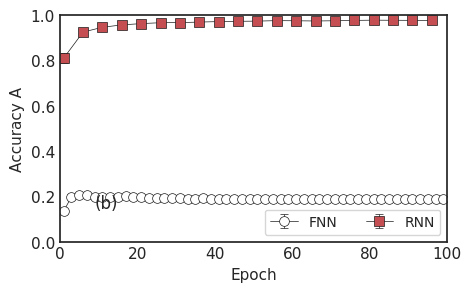

In [15]:
# For plotting Accuracy

plt.style.use('~/.config/matplotlib/stylelib/paper.mplstyle')
# minorLocator = AutoMinorLocator()

m = 1.0
figsize = (5*m,3*m) # increase figure size to make things look smaller
dpi = 100 # increase dpi to make things look bigger BUT only here
# since i'm doing pdf, it really doesn't matter what dpi I choose
capsize=3

# plt.rc('lines',markersize=8)
# plt.rc('font',family='sans-serif')
# plt.rc('font',sans-serif="Helvetica")
plt.rcParams.update({
    'font.family' : 'sans-serif',
    'font.sans-serif' : ['Helvetica'],
    'lines.markersize' : 7,
    'legend.fontsize' : 10,
    })
f, ax = plt.subplots(1,1,figsize=figsize,dpi=dpi)

for run in pltnames:
    mev = 1
    nepoch = params[run]["nepoch"]
    x = np.arange(1,nepoch+1,nepoch//(len(means[run])))
    end = len(x)//2 #-1 for all
    spidx = [0,2,4,6,7,10,20,30,48]

    if run == "fnn-mnist_ordered-1":
        end = -1
    if run == "mnist_lrg":
        mev = 1
        spidx = [0,1,2,3,4,8,14,19]
    x = x[0:end]
    
    y1 = means[run][:,3][0:end]
    y1m = means[run][:,3]-stds[run][:,3]
    y1p = means[run][:,3]+stds[run][:,3]
    
    y1err = stds[run][:,3][0:end]
  
    splgap = 10
    spx = np.linspace(x[0],x[-1],200)
    spl1 = interp.splrep(x[spidx],y1[spidx],k=2)
    
    y1_sp = interp.splev(spx,spl1)

#     ax.plot(spx,y1_sp,'k-',alpha=0.7)
    ax.errorbar(x,y1,yerr=y1err,linestyle="-",
                   marker=markdict[run],label=legdict[run],
                   errorevery=mev,markevery=mev,mfc=coldict[run],mec='k',
                   color="k",capsize=capsize)
    
    
handles, labels = ax.get_legend_handles_labels()
handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]

ax.legend(handles, labels,ncol=2)
# ax[1].legend(handles,labels,ncol=2,loc='lower right')
plt.legend()
ax.legend(ncol=2,loc="lower right")

f.subplots_adjust(hspace=0.1)
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy A")

_ = ax.set_xticks(np.arange(0,101,20))
i=0

# for tick in ax.xaxis.get_majorticklabels():
# #     tick.set_horizontalalignment("right")

# _ = ax.set_xticks(np.arange(0,50,10))
_ = ax.set_xlim(0,100)
_ = ax.set_ylim(ymax=1.0,ymin=0.)
_ = ax.set_yticks(np.linspace(0,1,6))
ax.tick_params(axis='both',which='both',direction='in')

ax.minorticks_on()
ax.text(.12,.15,'(b)',
    horizontalalignment='center',
    transform=ax.transAxes)

##############

In [20]:
figname = "imgs/fnn_acc"
ans = raw_input("You want to save "+figname+"?")
if ans != "no":
    print "Saving fig"
    f.savefig(figname+".eps",bbox_inches='tight',dpi="figure")

You want to save imgs/fnn_acc?
Saving fig


In [3]:
def get_xc(pts):
    #pts should be list of xy tuples
    x_coords, y_coords = zip(*pts)
    A = np.vstack([x_coords,np.ones(len(x_coords))]).T
    m, c = np.linalg.lstsq(A, y_coords)[0]
#     print("Line Solution is y = {m}x + {c}".format(m=m,c=c))
    
    return (0.5-c)/m

/home/walterms/jupyter_py2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


20 6.469538926976417 6.714948926976417 6.960358926976417
24 6.709202765271384 6.953152765271384 7.197102765271384
28 6.837228034638458 7.082218034638458 7.327208034638457


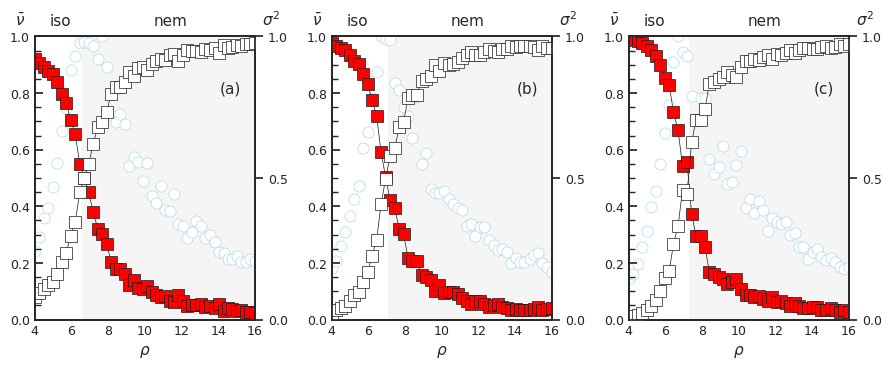

In [7]:
plt.style.use('~/.config/matplotlib/stylelib/paper.mplstyle')

figname = "imgs/ni"

m = 1.5
figsize = (7.*m,2.5*m) # increase figure size to make things look smaller
dpi = 100 # increase dpi to make things look bigger BUT only here
# since i'm doing pdf, it really doesn't matter what dpi I choose
capsize=3

# plt.rc('lines',markersize=8)
# plt.rc('font',family='sans-serif')
# plt.rc('font',sans-serif="Helvetica")
plt.rcParams.update({
    'font.family' : 'sans-serif',
    'font.sans-serif' : ['Helvetica'],
    'lines.markersize' : 8,
    'legend.fontsize' : 10,
    'lines.markeredgewidth' : 0.5,
    'font.size' : 11,
    'axes.titlesize' : 11,
    'axes.labelsize' : 11,
    'xtick.labelsize' : 9,
    'ytick.labelsize' : 9,
    })
# plt.rc('legend', fontsize=10)
f, ax = plt.subplots(1,3,figsize=figsize,dpi=dpi)

# Data for NI plot
Ns = [20,24,28]
fnames = {20:"edge.dat",24:"edge_2.dat",28:"edge_3.dat"}
legends = {20:[r'$\nu_0$',r'$\nu_1$'],
           24:[r'$\nu_0$',r'$\nu_1$'],
           28:[r'$\nu_0$',r'$\nu_1$']}
fmts = {20:['-','-'],
        24:['-','-'],
        28:['-','-']}
markers = ['s','s','v','^','s','s']
colors = ['r','g','b']
mev = 1
m = 0
axlist = []
Ns = [20,24,28]
dxrho = 0.
for n in Ns:
    fin = open(fnames[n],'r')
    x_c = 0.
    xedge,xrho,avg0,std0,avg1,std1,Lvar = [],[],[],[],[],[],[]
    for line in fin:
        if line == "\n":
            x_c = float(fin.next())
            fin.close()
            break
        l = [float(_) for _ in line.split()]
        xedge.append(l[0])
        xrho.append(l[1])
        avg0.append(l[2])
        std0.append(l[3])
        avg1.append(l[4])
        std1.append(l[5])
        Lvar.append(l[7])

    # plt.rc('axes', labelsize=16)

    min0,max0,min1,max1=[],[],[],[]
    for i in range(len(xrho)):
        min0.append(avg0[i]-std0[i])
        max0.append(avg0[i]+std0[i])
        min1.append(avg1[i]-std1[i])
        max1.append(avg1[i]+std1[i])

    alph = 1.0
    
    a = ax[m].errorbar(xrho, avg0, yerr=std0, fmt=fmts[n][0], marker=markers[4], 
                color='k', label=legends[n][0], markevery=mev, alpha=alph,mfc="red",
                errorevery=mev,zorder=2)
    axlist.append(a)
    a = ax[m].errorbar(xrho, avg1, yerr=std1, fmt=fmts[n][1], marker=markers[5], 
                color='k', label=legends[n][1], markevery=mev, alpha=alph,mfc="white",
                errorevery=mev,zorder=2)
    axlist.append(a)

    axtwin = ax[m].twinx()
    maxL = max(Lvar)
    Ls = [l/maxL for l in Lvar]
    a = axtwin.plot(xrho, Ls, 'o', markevery=mev, mec="lightblue",mfc="w",fillstyle="none",\
                    label=r'$\Lambda$',zorder=1)
    axtwin.axvspan(x_c,16.,color="whitesmoke")
    axtwin.set_yticks([0,0.5,1.0])
    axtwin.set_ylim(0,1.)
    
    ax[m].set_zorder(axtwin.get_zorder()+1) # put ax in front of ax2
    ax[m].patch.set_visible(False) # hide the 'canvas' 
    axlist.append(a)
    
    ylims = ax[m].get_ylim()
    marg = ax[m].margins() 
    # plt.plot([x_c, x_c], [ylims[0],ylims[1]], color="k", linestyle='-') 
    if n==24: alph = 1.0
    if n==20: alph = 1.0
    if n==28: alph = 1.0
    dxrho = xrho[1] - xrho[0]
    # pts 8 to 16 inclusive should be sent to get_xc
    pts = []
    for i in range(9,13): #9,13 is great
        pts.append((xrho[i],avg0[i]))
    x_c = get_xc(pts)
    print n, x_c-dxrho, x_c, x_c+dxrho
    
    # To add division line
    #ax[m].axvline(x_c,color='k',linestyle=fmts[n][1],alpha=0.8)
    #ax[m].axvspan(x_c-dxrho,x_c+dxrho,color='k',linestyle=fmts[n][1],alpha=0.2)
    
#     ax[m].legend()

    m+=1

for a in ax:
    handles, labels = a.get_legend_handles_labels()
    handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]

    #a.legend(handles, labels)

# ax[1].legend(handles,labels,ncol=2,loc='lower right')

ax[0].set_xlabel(r'$\rho$')
ax[1].set_xlabel(r'$\rho$')
ax[2].set_xlabel(r'$\rho$')
# ax[0].set_ylabel(r'$\nu$')
    
# plt.legend(handles=[axlist[0],axlist[2],axlist[4],axlist[1],axlist[3],axlist[5]],ncol=2)
for A in ax:
    _ = A.set_xticks(np.arange(4,17,2))
    _ = A.set_xlim(4,16)
    _ = A.set_ylim(ymax=1.,ymin=-0.)
    _ = A.set_yticks(np.linspace(0.,1.,6))
    A.tick_params(axis='both',which='both',direction='in')
    A.minorticks_on()
    A.text(3.2,1.04,r'$\bar{\nu}$',horizontalalignment='center')
    A.text(5.4,1.04,"iso",horizontalalignment='center')
    A.text(11.4,1.04,"nem",horizontalalignment='center')
    A.text(16.9,1.04,r'$\sigma^2$',horizontalalignment='center')

ax[0].text(.84,.8,'(a)',transform=ax[0].transAxes)
ax[1].text(.84,.8,'(b)',transform=ax[1].transAxes)
ax[2].text(.84,.8,'(c)',transform=ax[2].transAxes)
    
# _ = ax[1].set_yticklabels([])
# _ = ax[2].set_yticklabels([])
f.subplots_adjust(wspace=0.35)

# plt.gcf().set_size_inches(5,3)

In [17]:
figname = "imgs/ni_row"
ans = raw_input("You want to save "+figname+"?")
if ans != "no":
    print "Saving fig"
#     f.savefig(figname+".eps",bbox_inches='tight',dpi="figure")    
    f.savefig(figname+".eps",bbox_inches='tight',dpi=1000)

You want to save imgs/ni_row?
Saving fig


In [137]:
nplt = 5
legnames = ["avg.","X","T","U","D"]
figname = "xtud-acc"

markers = ['','x','+','v','d']
# markers = [(0,3,0),(3,0,0),(4,0,0),(3,1,45),(4,1,45)]

ncol = 4
alph = 1.0
colors = [(0.,0.8*(1.-(float(x)/ncol)),0.4+0.6*(float(x)/ncol),0.5) for x in range(ncol)]
colors = [(0,0,0,alph) for _ in range(ncol)]
colors = [(0.9,0.1,0.)] + colors

coldict,markdict,legdict = {},{},{}
for i in range(nplt):
    n = legnames[i]
    coldict.update({n:colors[i]})
    markdict.update({n:markers[i]})
    legdict.update({n:legnames[i]})

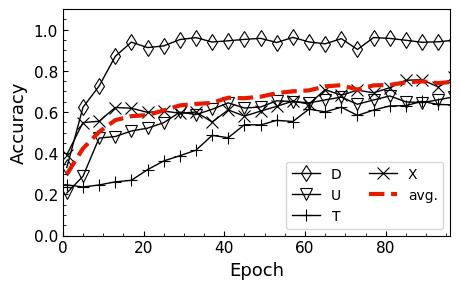

In [160]:
# [epoch trnloss trnacc testloss testacc xacc tacc uacc dacc]
plt.style.use('~/.config/matplotlib/stylelib/paper.mplstyle')

f, ax = plt.subplots(1,1)
i = 7
# plt.rc('lines',markersize=5)
mev = 2

run = fnames[0]
for leg in reversed(legnames):
    if i==3:
        alph=0.
        lsty = "--"
        lthic = 3
    else:
        alph=0.08
        lsty = "-"
        lthic = 1
        
        
    
    nepoch = params[run]["nepoch"]
    x = np.arange(1,nepoch+1,nepoch//(len(means[run])))
    end = len(x)//2 #-1 for all
    
    y = means[run][:,i]
    ym = means[run][:,i]-stds[run][:,i]
    yp = means[run][:,i]+stds[run][:,i]
    
    ax0, = ax.plot(x[0:end:mev],y[0:end:mev],color=coldict[leg],
                   marker=markdict[leg],label=legdict[leg],
                   linestyle=lsty,linewidth=lthic)
    mev=2
#     ax.fill_between(x[0:end:mev],ym[0:end:mev],yp[0:end:mev],color=coldict[leg],alpha=alph)

    i-=1
    
ax.legend(ncol=2,loc='lower right')

ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
_ = ax.set_xticks(np.arange(0,101,20))
_ = ax.set_xlim(0,96)
_ = ax.set_ylim(ymax=1.1,ymin=-0.)
# _ = A.set_yticks(np.linspace(0.,1.,6))
ax.tick_params(axis='both',which='both',direction='in')
ax.minorticks_on()

In [161]:
figname = "imgs/xtud-acc_2"
ans = raw_input("You want to save "+figname+"?")
if ans != "no":
    print "Saving fig"
    f.savefig(figname+".eps",bbox_inches='tight',dpi="figure")

You want to save imgs/xtud-acc_2?
Saving fig
